In [2]:
import sys
sys.path.insert(0, "/home/pwahle/microglia/")

import yaml
import importlib
import modules
importlib.reload(modules)
import os
from pathlib import Path
import subprocess

# load global variables and parameters
with open("../params.yml", 'r') as ymlfile:
    cfg = yaml.load(ymlfile, Loader=yaml.FullLoader)

globals().update(cfg)
r_path = str(Path('/usr/local/R-4.0.3/bin/Rscript'))  # path to r interpreter

from scipy import ndimage
import re
import cv2
from scipy import ndimage as ndi
import copy
import numpy as np
import matplotlib as mpl
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io
import nd2
from nd2reader import ND2Reader

In [35]:
#stitch img 2 and 8


dir_images = data_path6 + 'raw5_smFISH_bleached_C01/multi_MIP_prelim/'
def get_metadata_nis(dir_images):
    import os
    import pandas as pd
    images = os.listdir(dir_images)
    images = [image for image in images if '.tif' in image]
    images.sort()
    regex = r'Point(?P<well>\d+)_Point(?P<tile>\d+)'
    df = pd.DataFrame({'file': images})
    df = df.join(df['file'].astype(str).str.extractall(regex).groupby(level=0).last())
    df['well'] = df['well'].apply(lambda x: int(x))
    df['tile'] = df['tile'].apply(lambda x: int(x))
    return df

metadata = get_metadata_nis(dir_images)

In [37]:
well = 3
cutoff = 115
files = metadata[(metadata['well'] == well)]['file'].values

img0 = io.imread(dir_images + files[0])
length = img0.shape[0]

row1 = []
row2 = []
iterator = np.arange(49)[::7]
for x in iterator:
    if x in [0,14,28,42]:
        imgs = []
        for i in np.arange(49)[x:x+7]:
            imgs.append(io.imread(dir_images + files[i])[cutoff:length-cutoff,cutoff:length-cutoff,:])
        
        row1.append(np.hstack(imgs[::-1]))
    else:
        imgs = []
        for i in np.arange(49)[x:x+7]:
            imgs.append(io.imread(dir_images + files[i])[cutoff:length-cutoff,cutoff:length-cutoff,:])
        
        row2.append(np.hstack(imgs))
    

grid = np.vstack([row1[3],row2[2],row1[2],row2[1],row1[1],row2[0],row1[0]])

outdir = data_path6 + 'raw5_smFISH_bleached_C01/stitched_prelim/'
io.imsave(outdir + str(7) + '?.tif',grid)

/home/pwahle/anaconda3/envs/retina/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: /links/groups/treutlein/DATA/imaging/PW/microglia/livecell/test6/raw5_smFISH_bleached_C01/stitched_prelim/7?.tif is a low contrast image


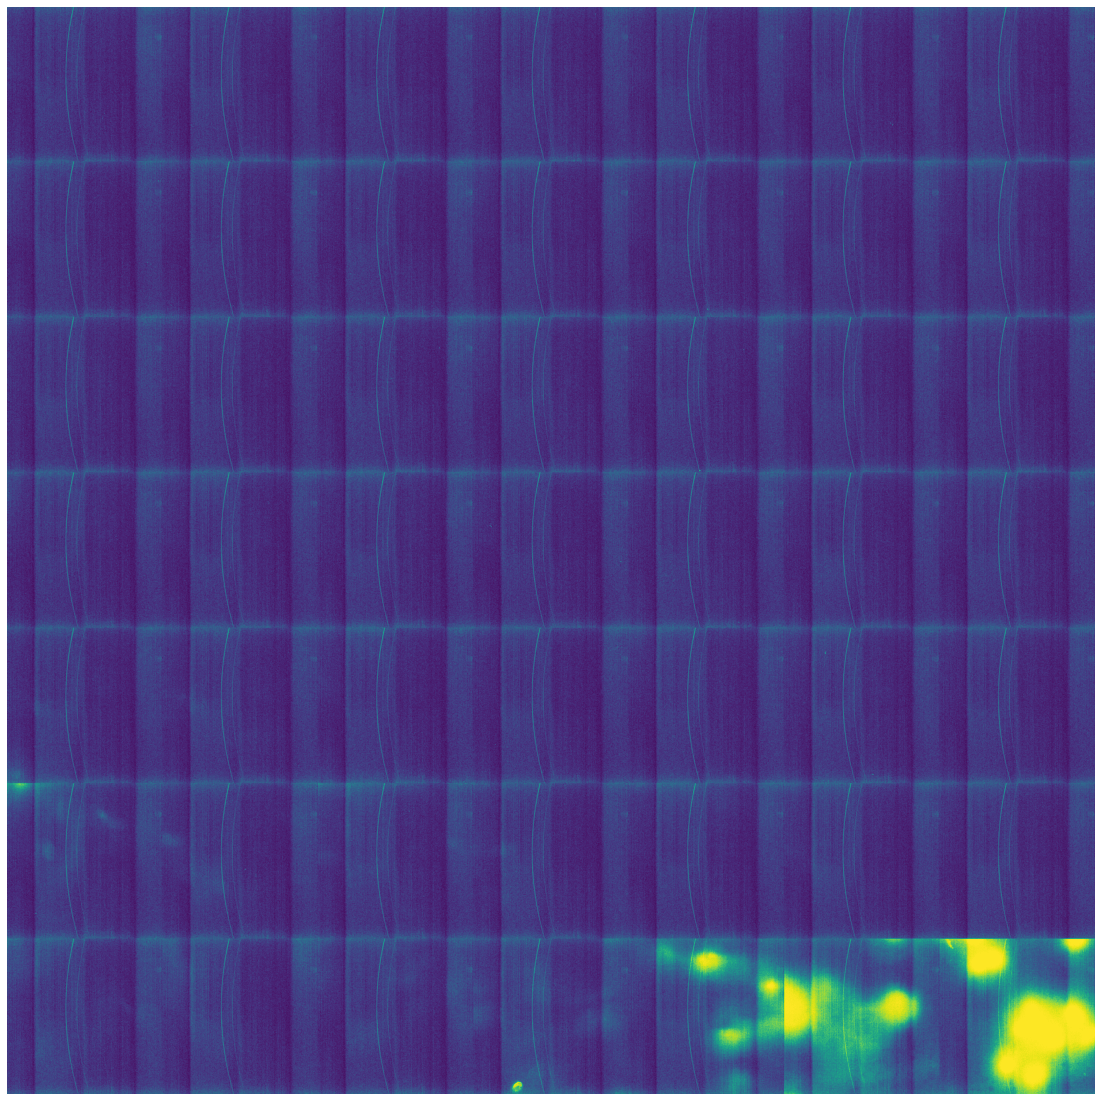

In [38]:
def scale_image(image, top_bottom = [0,0]):
    if top_bottom == [0,0]:
        image = np.interp(image, (image.min(), image.max()), (0, +65535))
    else:
        image = np.interp(image, (np.percentile(image, top_bottom[1]), np.percentile(image, 100 - top_bottom[0])), (0, +65535))
    return image

plt.figure(figsize = (20,20))
plt.imshow(scale_image(grid[...,0],[5,60]))
plt.axis('off')
plt.show()

In [48]:
img = io.imread(data_path6 + 'raw4_singletiles/stitched/' + str(well+1) + '.tif')

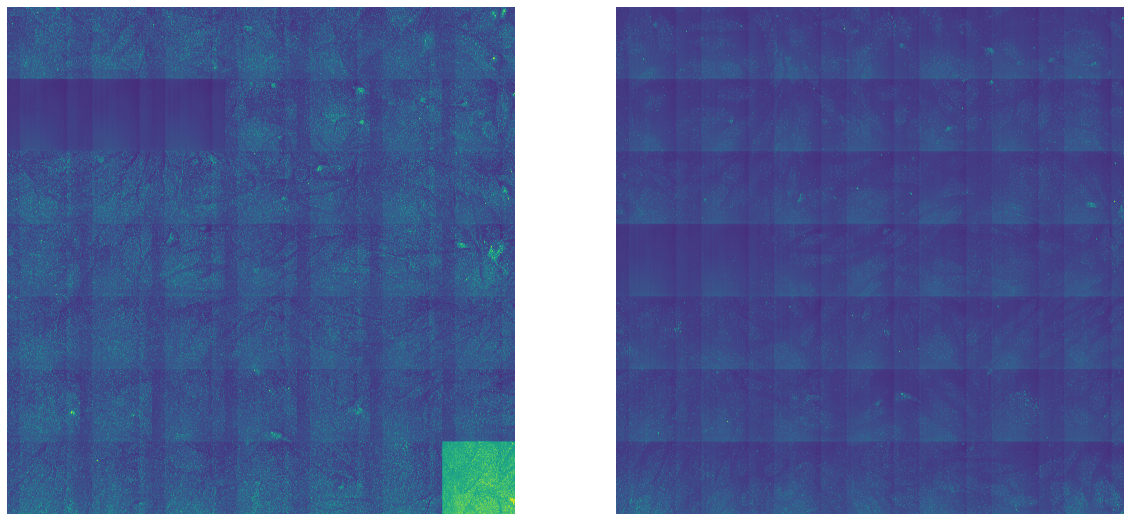

In [49]:
def scale_abs(image, top_bottom = [30000,100]):
    if top_bottom == [0,0]:
        image = np.interp(image, (image.min(), image.max()), (0, +65535))
    else:
        image = np.interp(image, (top_bottom[1], top_bottom[0]), (0, +65535))
    return image

fig,ax = plt.subplots(1,2,figsize = (20,10))
ax[0].imshow(scale_abs(img[...,2],[200,100]))
ax[0].axis('off')
ax[1].imshow(scale_abs(grid[...,2],[200,100]))
ax[1].axis('off')
plt.show()

In [13]:
img[...,1].max()

33582